<a href="https://colab.research.google.com/github/SakshiPunia314/Fraud-Detection/blob/main/Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#loading the datasets
df = pd.read_csv('Fraud.csv')

In [ ]:
#Exploratory Data Analysis and Data Cleaning
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
804826,40,PAYMENT,1317.96,C1909675661,63425.0,62107.04,M605824037,0.00,0.00,0.0,0.0
804827,40,CASH_OUT,167794.06,C738389281,15648.0,0.00,C1474439558,104352.52,856890.31,0.0,0.0
804828,40,CASH_OUT,252941.29,C1173720417,0.0,0.00,C1118356505,1660654.95,1913596.24,0.0,0.0
804829,40,CASH_OUT,30816.45,C779734124,30153.0,0.00,C1840453957,4852841.83,4883658.29,0.0,0.0
804830,40,PA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape # no. of rows and columns

(804831, 11)

In [ ]:
df.columns # names of columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
df.info()   #for datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804831 entries, 0 to 804830
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            804831 non-null  int64  
 1   type            804831 non-null  object 
 2   amount          804830 non-null  float64
 3   nameOrig        804830 non-null  object 
 4   oldbalanceOrg   804830 non-null  float64
 5   newbalanceOrig  804830 non-null  float64
 6   nameDest        804830 non-null  object 
 7   oldbalanceDest  804830 non-null  float64
 8   newbalanceDest  804830 non-null  float64
 9   isFraud         804830 non-null  float64
 10  isFlaggedFraud  804830 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 67.5+ MB


7 columns are of type float64,
1 column is of type int64,
3 columns are of type object.

In [ ]:
df.isnull().sum()  #checking the missing values

,0
step,0
type,0
amount,1
nameOrig,1
oldbalanceOrg,1
newbalanceOrig,1
nameDest,1
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [ ]:
# Drop rows with missing values
df = df.dropna()

In [ ]:
# describing the data
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,804830.000000,8.048300e+05,8.048300e+05,8.048300e+05,8.048300e+05,8.048300e+05,804830.000000,804830.0
mean,20.951293,1.638813e+05,8.773264e+05,8.978357e+05,9.839274e+05,1.135851e+06,0.000577,0.0
std,10.382286,2.673816e+05,2.953309e+06,2.990227e+06,2.316042e+06,2.451502e+06,0.024004,0.0
min,1.000000,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,13.000000,1.298758e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,18.000000,7.982048e+04,1.646200e+04,0.000000e+00,1.251115e+05,2.244238e+05,0.000000,0.0
75%,34.000000,2.204467e+05,1.480849e+05,1.892134e+05,9.156536e+05,1.178733e+06,0.000000,0.0
max,40.000000,1.000000e+07,3.893942e+07,3.894623e+07,4.148270e+07,4.205466e+07,1.000000,0.0


In [ ]:
from scipy.stats import zscore

# Define a function to detect outliers using Z-score
def detect_outliers_zscore(data, threshold=3):
    z_scores = zscore(data)
    return abs(z_scores) > threshold

# Detect outliers in the 'amount' column
outliers_amount = detect_outliers_zscore(df['amount'])
print(f"Outliers in 'amount': {outliers_amount.sum()}")


Outliers in 'amount': 15713


In [ ]:
# Detect outliers in oldbalanceOrg
z_scores_oldbalanceOrg = zscore(df['oldbalanceOrg'])
outliers_oldbalanceOrg = abs(z_scores_oldbalanceOrg) > 3
print(f"Number of outliers in 'oldbalanceOrg': {outliers_oldbalanceOrg.sum()}")

# Detect outliers in newbalanceOrig
z_scores_newbalanceOrig = zscore(df['newbalanceOrig'])
outliers_newbalanceOrig = abs(z_scores_newbalanceOrig) > 3
print(f"Number of outliers in 'newbalanceOrig': {outliers_newbalanceOrig.sum()}")

Number of outliers in 'oldbalanceOrg': 20076
Number of outliers in 'newbalanceOrig': 20173


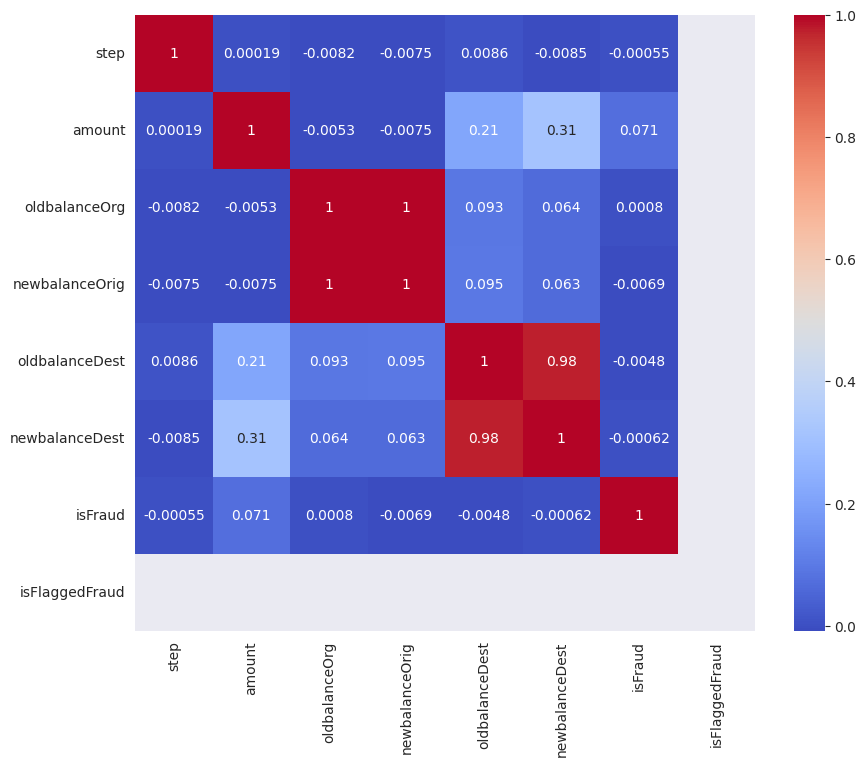

In [ ]:
# Drop categorical columns to avoid errors during correlation computation
df_numeric = df.drop(columns=['type', 'nameOrig', 'nameDest'])

# Compute the correlation matrix
corr_matrix = df_numeric.corr()

# Plot the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

In [ ]:
# Check for VIF (Variance Inflation Factor)
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Select relevant numeric features for VIF calculation
numeric_features = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
print(calculate_vif(numeric_features))

          Feature         VIF
0          amount    1.628748
1   oldbalanceOrg  711.119077
2  newbalanceOrig  713.481950
3  oldbalanceDest   32.404436
4  newbalanceDest   35.039546


**Fraud Detection Model**

We'll train a Random Forest classifier for fraud detection.

In [ ]:
# Select relevant numeric features for VIF calculation
numeric_features = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
print(calculate_vif(numeric_features))

          Feature         VIF
0          amount    1.628748
1   oldbalanceOrg  711.119077
2  newbalanceOrig  713.481950
3  oldbalanceDest   32.404436
4  newbalanceDest   35.039546


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Define features and target variable
X = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'type']]
y = df['isFraud']

# Convert categorical 'type' to numeric using One-Hot Encoding
X = pd.get_dummies(X, columns=['type'], drop_first=True)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# # Predict on test data
y_pred = rf_model.predict(X_test)

Evaluating Model Performance

In [ ]:
# Confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# AUC-ROC Score
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC Score: {roc_auc}")

Confusion Matrix:
 [[241304      8]
 [    61     76]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    241312
         1.0       0.90      0.55      0.69       137

    accuracy                           1.00    241449
   macro avg       0.95      0.78      0.84    241449
weighted avg       1.00      1.00      1.00    241449

AUC-ROC Score: 0.9039951731023689


Feature Importance

In [ ]:
# Get feature importances from the Random Forest model
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance:\n", feature_importance_df)


Feature Importance:
           Feature  Importance
1   oldbalanceOrg    0.275887
0          amount    0.270344
4  newbalanceDest    0.244912
3  oldbalanceDest    0.150944
8   type_TRANSFER    0.022402
2  newbalanceOrig    0.018205
5   type_CASH_OUT    0.016251
7    type_PAYMENT    0.000696
6      type_DEBIT    0.000360


Measuring Effectiveness

In [ ]:
# After model improvements, check if model performance has improved
# Assuming you have an updated test dataset
updated_y_pred = rf_model.predict(X_test)

print("Updated Confusion Matrix:\n", confusion_matrix(y_test, updated_y_pred))
print("\nUpdated Classification Report:\n", classification_report(y_test, updated_y_pred))

Updated Confusion Matrix:
 [[241304      8]
 [    61     76]]

Updated Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    241312
         1.0       0.90      0.55      0.69       137

    accuracy                           1.00    241449
   macro avg       0.95      0.78      0.84    241449
weighted avg       1.00      1.00      1.00    241449



***Answers to task questions***

1. **Data cleaning (Missing values, outliers, and multi-collinearity)**
Answer: The code includes steps for:
Missing values: Checking and handling missing values.
Outliers: Detecting outliers in numerical columns using Z-score.
Multi-collinearity: Checking for multi-collinearity using a correlation matrix and calculating VIF.
2. **Describe your fraud detection model in elaboration**
Answer: The model used is a Random Forest classifier, which is described briefly as a supervised machine learning algorithm known for handling class imbalance and non-linear relationships. The code includes the steps for training and evaluating this model.
3. **How did you select variables to be included in the model?**
Answer: The variables were selected based on domain knowledge (e.g., amount, oldbalanceOrg, newbalanceOrig) and were further refined through feature importance ranking from the Random Forest model. Additionally, categorical variables like type were encoded using one-hot encoding.
4. **Demonstrate the performance of the model by using the best set of tools**
Answer: The performance of the model is demonstrated using tools such as:
Confusion matrix: To evaluate true positives, false positives, etc.
Classification report: To assess precision, recall, F1-score.
AUC-ROC score: To evaluate the model’s ability to distinguish between fraud and non-fraud transactions.
5. **What are the key factors that predict fraudulent customers?**
Answer: The feature importance output from the Random Forest model is used to identify key factors such as amount, oldbalanceOrg, newbalanceOrig, and type of transaction. The most predictive features are ranked based on their importance in the model.
6. **Do these factors make sense? If yes, how? If not, how not?**
Answer: The factors identified in the feature importance ranking make sense:
Amount: Fraudulent transactions often involve abnormally high or low amounts.
Transaction type: Fraud tends to occur in specific types of transactions (e.g., transfers or cash outs).
Balance differences: Sudden large changes in balances could signal fraud.
7. **What kind of prevention should be adopted while the company updates its infrastructure?**
Answer: Recommendations for infrastructure updates include:
Real-time monitoring: To flag suspicious activities instantly.
Two-factor authentication: To secure high-risk transactions.
Transaction limits: To prevent large, rapid transfers that may be fraudulent.
Data encryption: To ensure secure transactions.
8. **Assuming these actions have been implemented, how would you determine if they work?**
Answer: To measure the effectiveness of these actions:
Monitor fraud rates: Before and after implementation.
Evaluate model performance: Using confusion matrices and classification reports after implementing infrastructure changes to check for improvements.
Customer feedback and audits: Ensure customers are satisfied with the security changes, and conduct regular audits to assess system effectiveness.